# Test machine learning models for predicting median snowline elevations using terrain parameters

In [ ]:
#Helpful links!

#https://scikit-learn.org/stable/tutorial/index.html
#https://scikit-learn.org/stable/tutorial/basic/tutorial.html

#https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html #sphx-glr-auto-examples-classification-plot-classifier-comparison-py

#https://medium.com/analytics-vidhya/how-to-use-google-colab-with-github-via-google-drive-68efb23a42d

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
import os

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
!pip install geopandas #Installation format for packages not included with Google Colab.

In [ ]:
# May be interesting to install sliderule package, may need a specific environment though.

In [2]:
# If using Google Colab, mount Google Drive so you can access the files in this folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Uncomment the line below to locate the snow-cover-mapping-application folder in your Drive using os.listdir()
# os.listdir('drive/MyDrive/Research/PhD/snow_cover_mapping/snow_cover_mapping_application/snow-cover-mapping-application/')

In [6]:
# Load training data

# ALEXANDRA'S PATH TO DATA:
path_to_folder = '/content/drive/MyDrive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/terrain-parameters/'

# Remote Sensing Project Path to Data:
#path_to_folder = ('/content/drive/Shareddrives/GEOG361_Final_Project/')

# RAINEY'S PATH TO DATA:
#path_to_folder = '/content/drive/MyDrive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/snow-cover-mapping-application/inputs-outputs/'

In [7]:
os.listdir(path_to_folder)

['ELA_training_data.csv',
 'O1_1_terrain_parameters - Sheet1.csv',
 'SteepSlope_terrainparameters - Sheet1.csv',
 'ModerateSlope_terrainparameters - Sheet1.csv',
 'GentleSlope_terrainparameters - Sheet1.csv',
 'SimpleGeometry_terrainparameters - Sheet1.csv',
 'ComplexGeometry_terrain_parameters - Sheet1.csv',
 'ModerateGeometry_terrainparameters - Sheet1.csv',
 'O2_2_terrain_parameters - Sheet1.csv',
 'O2_3_terrain_parameters - Sheet1.csv',
 'O2_4_terrain_parameters - Sheet1.csv',
 'O2_6_terrain_parameters - Sheet1.csv',
 'O2_5_terrain_parameters - Sheet1.csv',
 'O2_1_terrain_parameters - Sheet1.csv',
 'O1_2_terrain_parameters - Sheet1.csv',
 'GoogleSheets',
 'Totalsite_terrainparameters.csv',
 'ELA_training_data.gsheet']

In [8]:
fn = 'O1_1_terrain_parameters - Sheet1.csv'  # file name
# fn = ('Totalsite_terrainparameters.csv') # <--This file doesn't have snow cover observations, just terrain parameters
df = pd.read_csv(os.path.join(path_to_folder, fn))

# format 'datetime' column as pandas.datetimes (no datetime column in terrain parameters CSVs)
#if 'datetime' in df.keys():
  #df['datetime'] = pd.to_datetime(df['datetime'])
#df

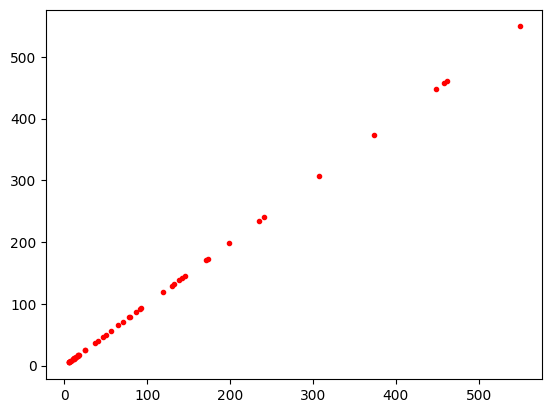

In [12]:
# Plot some data
plt.plot(df['Area'], df['Area'], 'r.')
plt.show()

## Split training data into X (predictive features) and y (output labels)

In [15]:
# Define which columns to use as predictive "features" and which to use as outcome "labels"
# Feel free to adjust and play around with this
training_columns = ['Area','Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
label = ['Zmin']

# Separate features and labels
X = df[training_columns]
y = df[label]


## Define supervised machine learning models to test


Feel free to add more! See the [SciKitLearn Classifier comparison page](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) for more models, etc.

In [16]:
# Define supervised machine learning models to test
# Adjust hyperparameters to see if it improves the model errors
# (see documentation for each model)

# Classifier names
names = [
  "Linear Regression",
    "Random Forest Regression",
    "Decision Tree Regression",
    "Support Vector Regression",
    "Gradient Boosting Regression",
    "Ridge Regression"


]

    #"Linear Regression",
   # "Random Forest Regression",
    #"Decision Tree Regression",
    #"Support Vector Regression",
    #"Gradient Boosting Regression",
    #"Ridge Regression"
    #"Nearest Neighbors"
    #"AdaBoost"
    #"Naive Bayes"
    #"Neural Net"
    #"Gaussian Process"
    #"Linear SVM"

# Classifiers
classifiers = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    SVR(),
    GradientBoostingRegressor(),
    Ridge()
]


---
---

## Rainey is testing model training and plotting here...
Develop ML models for each subregion separately. For each subregion model, save the feature importances. Then, plot distribution of feature importances for all ML models.

Use permutation to estimate feature importances for each model. See [this link](https://scikit-learn.org/stable/modules/permutation_importance.html) for more info.

In [ ]:
# -----Determine unique subregions and number of sites in each subregion
df[['O1Region', 'O2Region']] = df[['O1Region', 'O2Region']].astype(float)
df = df.sort_values(by=['O1Region', 'O2Region']).reset_index(drop=True)
# grab unique site names with their O1 and O2 regions
unique_sites = df[['site_name', 'O1Region', 'O2Region']].drop_duplicates()
# count number of sites in each unique O1 and O2 region combination
unique_subregion_counts = unique_sites[['O1Region', 'O2Region']].value_counts().reset_index(name='count')
# sort by subregion number
unique_subregion_counts = unique_subregion_counts.sort_values(by=['O1Region', 'O2Region'])
# save just the unique subregion values
unique_subregions = unique_subregion_counts[['O1Region', 'O2Region']].values
# print unique subregions and site counts
unique_subregion_counts

KeyError: ignored

In [ ]:
# -----Define a function for determining subregion name and color for plotting
def determine_subregion_name_color(o1, o2):
    if (o1 == 1.0) and (o2 == 1.0):
        subregion_name, color = 'Brooks Range', 'c'
    elif (o1 == 1.0) and (o2 == 2.0):
        subregion_name, color = 'Alaska Range', '#1f78b4'
    elif (o1 == 1.0) and (o2 == 3.0):
        subregion_name, color = 'Aleutians', '#6d9c43'
    elif (o1 == 1.0) and (o2 == 4.0):
        subregion_name, color = 'W. Chugach Mtns.', '#264708'
    elif (o1 == 1.0) and (o2 == 5.0):
        subregion_name, color = 'St. Elias Mtns.', '#fb9a99'
    elif (o1 == 1.0) and (o2 == 6.0):
        subregion_name, color = 'N. Coast Ranges', '#e31a1c'
    elif (o1 == 2.0) and (o2 == 1.0):
        subregion_name, color = 'N. Rockies', '#cab2d6'
    elif (o1 == 2.0) and (o2 == 2.0):
        subregion_name, color = 'N. Cascades', '#fdbf6f'
    elif (o1 == 2.0) and (o2 == 3.0):
        subregion_name, color = 'C. Rockies', '#9657d9'
    elif (o1 == 2.0) and (o2 == 4.0):
        subregion_name, color = 'S. Cascades', '#ff7f00'
    elif (o1 == 2.0) and (o2 == 5.0):
        subregion_name, color = 'S. Rockies', '#6a3d9a'
    else:
        subregion_name = 'O1:' + o1 + ' O2:' + o2
        color = 'k'

    return subregion_name, color

In [ ]:
from sklearn.inspection import permutation_importance

training_columns_only_Zmed = ['Area','Zmed', 'Slope', 'Aspect']
# -----Iterate over unique subregions (O1 and O2 region combinations)
# initialize data table of feature importances
feature_importances_df_full = pd.DataFrame()
i = 0 # loop counter
for o1, o2 in unique_subregions:

    # grab subregion name and color for plotting
    subregion_name, color = determine_subregion_name_color(o1, o2)
    print(subregion_name)

    # subset training data for subregion
    df_subregion = df.loc[(df['O1Region']==o1) & (df['O2Region']==o2)]
    # define X and y
    X_subregion = df_subregion[training_columns_only_Zmed]
    y_subregion = df_subregion[label]
    # convert y to 1D row vector
    y_subregion = np.transpose(y_subregion.values)[0]

    # initialize empty array for storing mean absolute errors
    abs_err_mean = np.zeros(len(names))

    # iterate over ML classifiers
    for j, name, classifier in list(zip(np.arange(0,len(names)), names, classifiers)):

        # train model and estimate feature importances using permutation
        classifier.fit(X_subregion, y_subregion)
        perm = permutation_importance(classifier, X_subregion, y_subregion,
                                      scoring='neg_mean_squared_error')
        # get importances
        feature_importances = perm.importances_mean
        # normalize importances so that they sum to about 1
        feature_importances = feature_importances / np.sum(feature_importances)

        feature_importances_df = pd.DataFrame({'subregion': [subregion_name],
                                               'color': [color],
                                               'model': [name]
                                               })
        for column, importance in list(zip(training_columns_only_Zmed, feature_importances)):
            feature_importances_df[column] = [importance]
        # concatenate to full feature importances df
        feature_importances_df_full = pd.concat([feature_importances_df_full, feature_importances_df])

    i += 1 # increase loop counter

feature_importances_df_full.reset_index(drop=True, inplace=True)
feature_importances_df_full

NameError: ignored

In [ ]:
import seaborn as sns

# -----Plot results by column
# construct dictionary of colors for each subregion
color_dict = dict(feature_importances_df_full[['subregion', 'color']].drop_duplicates().values)
fig, ax = plt.subplots(2, 2, figsize=(14, 8))
ax = ax.flatten()
for i, column in enumerate(training_columns_only_Zmed):
    sns.boxplot(data=feature_importances_df_full, x='subregion', y=column,
                hue='subregion', ax=ax[i], palette=color_dict, width=9)
    ax[i].set_title(column)
    ax[i].set_xlabel('')
    ax[i].set_xticks([])
    ax[i].set_xticklabels([])
    ax[i].set_xlim(-5,13)
    ax[i].set_ylim(-0.1,1.1)
    if i!=3:
        ax[i].get_legend().remove()
    else:
        ax[i].legend(loc='center right', bbox_to_anchor=[1.2, 1.0, 0.2, 0.2])
plt.show()


NameError: ignored

In [ ]:
# -----Plot results by subregion
# fig, ax = plt.subplots(3, 3, figsize=(14, 8))
# ax = ax.flatten()
# for i, column in enumerate(unique_subregions):

#     sns.boxplot(data=feature_importances_df_full, x='subregion', y=column,
#                 hue='subregion', ax=ax[i], palette=color_dict, width=9)
#     ax[i].set_title(column)
#     ax[i].set_xlabel('')
#     ax[i].set_xticks([])
#     ax[i].set_xticklabels([])
#     ax[i].set_xlim(-5,13)
#     ax[i].set_ylim(-0.1,1.1)
#     if i!=3:
#         ax[i].get_legend().remove()
#     else:
#         ax[i].legend(loc='center right', bbox_to_anchor=[1.2, 1.0, 0.2, 0.2])
# plt.show()

---
---

In [ ]:
#How this works:

#this code performs K-fold cross-validation for multiple classifiers, trains and evaluates the models on each fold, calculates the mean absolute error for each classifier, and displays the performance results.


#abs_err = np.zeros(len(names)): This line creates a NumPy array of zeros with the length equal to the number of classifiers. This array will store the mean absolute error for each classifier.


#for i, (name, clf) in enumerate(zip(names, classifiers)):: This loop iterates over the names and classifiers, which are provided in the names and classifiers variables. The enumerate function is used to get both the index (i) and the corresponding name and classifier.

#num_folds = 10: This line sets the number of folds to 10.
#kfold = KFold(n_splits=num_folds, shuffle=True, random_state=1): This line creates an instance of the KFold class with the specified number of splits, enabling shuffling of the data, and setting a random state for reproducibility.
#abs_err_folds = np.zeros(num_folds): This line creates a NumPy array of zeros with the length equal to the number of folds. This array will store the mean absolute error for each fold.
#j = 0: This line initializes a counter variable j to keep track of the fold number.


#for train_ix, test_ix in kfold.split(X):: This loop iterates over the indices generated by the KFold split on the feature data X. The train_ix and test_ix contain the indices for the training and testing data for each fold, respectively.
#X_train, X_test = X.loc[train_ix], X.loc[test_ix]: This line splits the feature data X into training and testing sets based on the fold indices.
#y_train, y_test = y[train_ix], y[test_ix]: This line splits the target variable y into training and testing sets based on the fold indices.
#Fitting the model and predicting:

#clf.fit(X_train, y_train): This line fits (trains) the classifier model (clf) using the training data.
#y_pred = clf.predict(X_test): This line predicts the outputs for the testing data (X_test) using the trained model.

#abs_err_folds[j] = np.nanmean(np.abs(y_test - y_pred)): This line calculates the mean absolute error for the current fold by taking the absolute difference between the true target values (y_test) and the predicted values (y_pred), and then computing the mean. The result is stored in the abs_err_folds array for the corresponding fold.
#j += 1: This line increments the fold counter.

#abs_err[i] = np.nanmean(abs_err_folds): This line computes the mean of the absolute errors across all folds and assigns it to the abs_err array at the corresponding index (i).


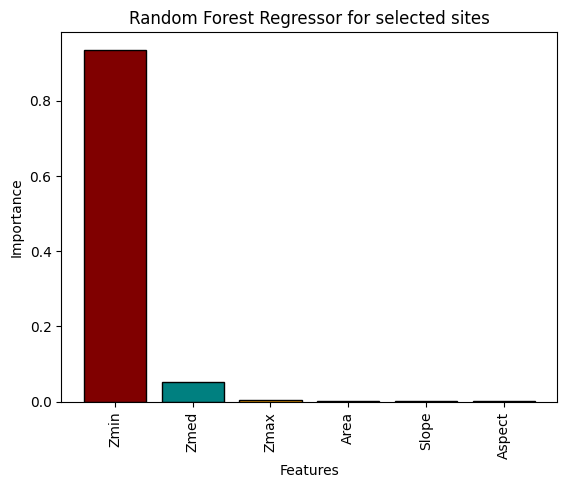

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

training_columns = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
labels = 'Zmin' #If you're using the training_data file, add an 's' after snowline in this line.

X = df[training_columns]
y = df[labels]

clf = RandomForestRegressor()
clf.fit(X, y)

feature_importances = clf.feature_importances_

sorted_indices = sorted(range(len(feature_importances)), key=lambda i: feature_importances[i], reverse=True)
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]
sorted_feature_names = [training_columns[i] for i in sorted_indices]

plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, color=['maroon', 'teal', 'orange', 'pink', 'cyan', 'purple'],edgecolor = 'black')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation='vertical')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Regressor for selected sites')

plt.show()


In [ ]:
#How this works:

#Splitting the data into features and target variable:

#X = df[training_columns]:  selects the columns specified in training_columns from the DataFrame df and assigns them to the variable X, which represents the features.
#y = df[labels]: selects the column specified in labels from the DataFrame df and assigns it to the variable y, which represents the target variable.

#clf = RandomForestRegressor():  creates an instance of the RandomForestRegressor class with default parameters.
#clf.fit(X, y): fits (trains) the RandomForestRegressor model using the features X and the target variable y.

#feature_importances = clf.feature_importances_: retrieves the feature importances from the trained model and assigns them to the variable feature_importances.

#sorted_indices = sorted(range(len(feature_importances)), key=lambda i: feature_importances[i], reverse=True): generates a list of indices that would sort the feature importances in descending order.

#sorted_feature_importances = [feature_importances[i] for i in sorted_indices]:  creates a new list of feature importances sorted according to the indices obtained in the previous step.
#sorted_feature_names = [training_columns[i] for i in sorted_indices]: creates a new list of feature names sorted according to the indices obtained in the previous step.

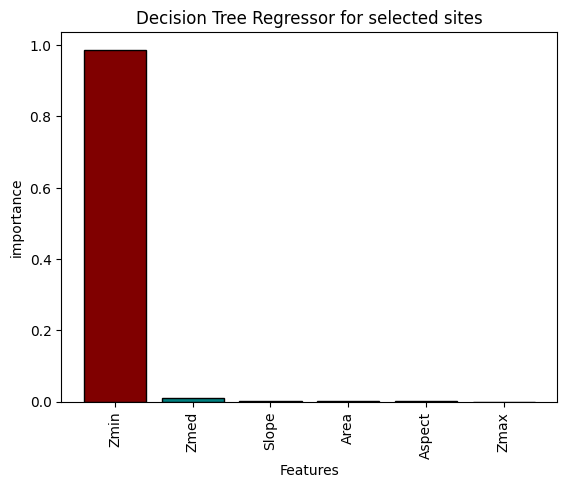

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


training_columns = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
labels = 'Zmin'

X = df[training_columns]
y = df[labels]

clf = DecisionTreeRegressor()
clf.fit(X, y)

feature_importances = clf.feature_importances_

sorted_indices = sorted(range(len(feature_importances)), key=lambda i: feature_importances[i], reverse=True)
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]
sorted_feature_names = [training_columns[i] for i in sorted_indices]

plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, color=['maroon', 'teal', 'orange', 'pink', 'cyan', 'purple'], edgecolor = 'black')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation='vertical')


plt.xlabel('Features')
plt.ylabel('importance')
plt.title('Decision Tree Regressor for selected sites')

plt.show()




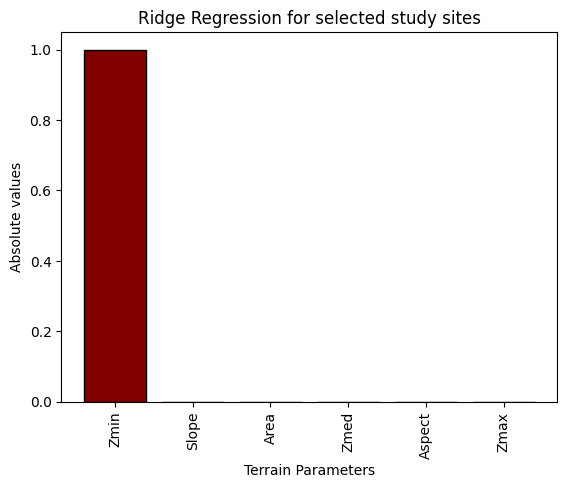

In [19]:
import pandas as pd
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt


labels = 'Zmin'

X = df[training_columns]
y = df[labels]

clf = Ridge()
clf.fit(X, y)

coefficients = np.abs(clf.coef_)

sorted_indices = np.argsort(coefficients)[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = np.array(training_columns)[sorted_indices]

plt.bar(range(len(sorted_coefficients)), sorted_coefficients, color=['maroon', 'teal', 'orange', 'pink', 'cyan', 'purple'], edgecolor = 'black')
plt.xticks(range(len(sorted_coefficients)), sorted_feature_names, rotation='vertical')

plt.xlabel('Terrain Parameters')
plt.ylabel('Absolute values')
plt.title('Ridge Regression for selected study sites')

plt.show()



In [ ]:
# Cross validation is the best way to assess accuracy:
  # - Reduces overfitting: Machine may learn data too well, unable to generalize new data
  # - Cross validation will split the data into multiple folds. Then,  then the avg accuracy of the model across all folds is calculated

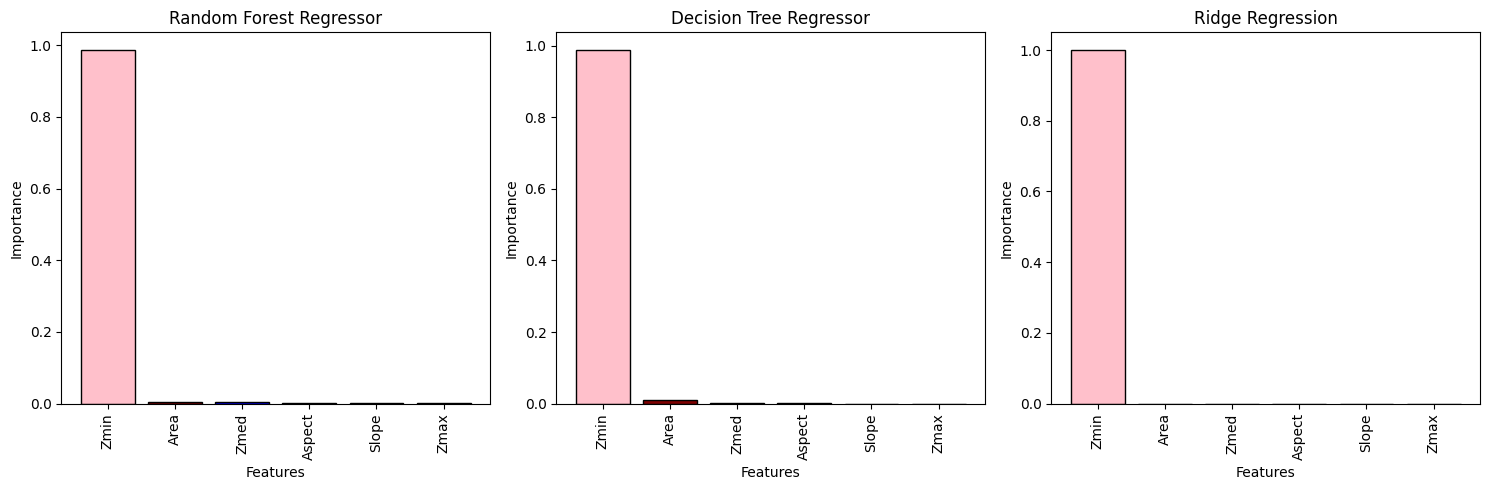

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge


training_columns = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
labels = 'Zmin'
X = df[training_columns]
y = df[labels]

random_forest = RandomForestRegressor()
decision_tree = DecisionTreeRegressor()
ridge_regression = Ridge()

random_forest.fit(X, y)
decision_tree.fit(X, y)
ridge_regression.fit(X, y)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

colors = {
    'Area': 'maroon',
    'Zmin': 'pink',
    'Zmax': 'violet',
    'Zmed': 'blue',
    'Slope': 'red',
    'Aspect': 'purple'
}

rf_feature_importances = random_forest.feature_importances_
dt_feature_importances = decision_tree.feature_importances_
ridge_feature_importances = np.abs(ridge_regression.coef_)

sorted_rf_indices = np.argsort(rf_feature_importances)[::-1]
sorted_dt_indices = np.argsort(dt_feature_importances)[::-1]
sorted_ridge_indices = np.argsort(ridge_feature_importances)[::-1]

sorted_rf_feature_importances = rf_feature_importances[sorted_rf_indices]
sorted_dt_feature_importances = dt_feature_importances[sorted_dt_indices]
sorted_ridge_feature_importances = ridge_feature_importances[sorted_ridge_indices]

sorted_training_columns = np.array(training_columns)[sorted_rf_indices]

axs[0].bar(range(len(sorted_rf_feature_importances)), sorted_rf_feature_importances, color=[colors[column] for column in sorted_training_columns], edgecolor = 'black')
axs[0].set_xticks(range(len(sorted_rf_feature_importances)))
axs[0].set_xticklabels(sorted_training_columns, rotation='vertical')
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Importance')
axs[0].set_title('Random Forest Regressor')

axs[1].bar(range(len(sorted_dt_feature_importances)), sorted_dt_feature_importances, color=[colors[column] for column in sorted_training_columns], edgecolor = 'black')
axs[1].set_xticks(range(len(sorted_dt_feature_importances)))
axs[1].set_xticklabels(sorted_training_columns, rotation='vertical')
axs[1].set_xlabel('Features')
axs[1].set_ylabel('Importance')
axs[1].set_title('Decision Tree Regressor')

axs[2].bar(range(len(sorted_ridge_feature_importances)), sorted_ridge_feature_importances, color=[colors[column] for column in sorted_training_columns],edgecolor = 'black')
axs[2].set_xticks(range(len(sorted_ridge_feature_importances)))
axs[2].set_xticklabels(sorted_training_columns, rotation='vertical')
axs[2].set_xlabel('Features')
axs[2].set_ylabel('Importance')
axs[2].set_title('Ridge Regression')

plt.tight_layout()
plt.show()



In [ ]:
#the feature importances are sorted in descending order using np.argsort() with the [::-1] indexing to reverse the order.

In [ ]:
#Make sure that it sorts the name of the variables correctly. Assign colors to each feature in the data set, not just random ones.

#note to self: 2nd subplot is different than figure plotted above, need to fix. (Decision tree)

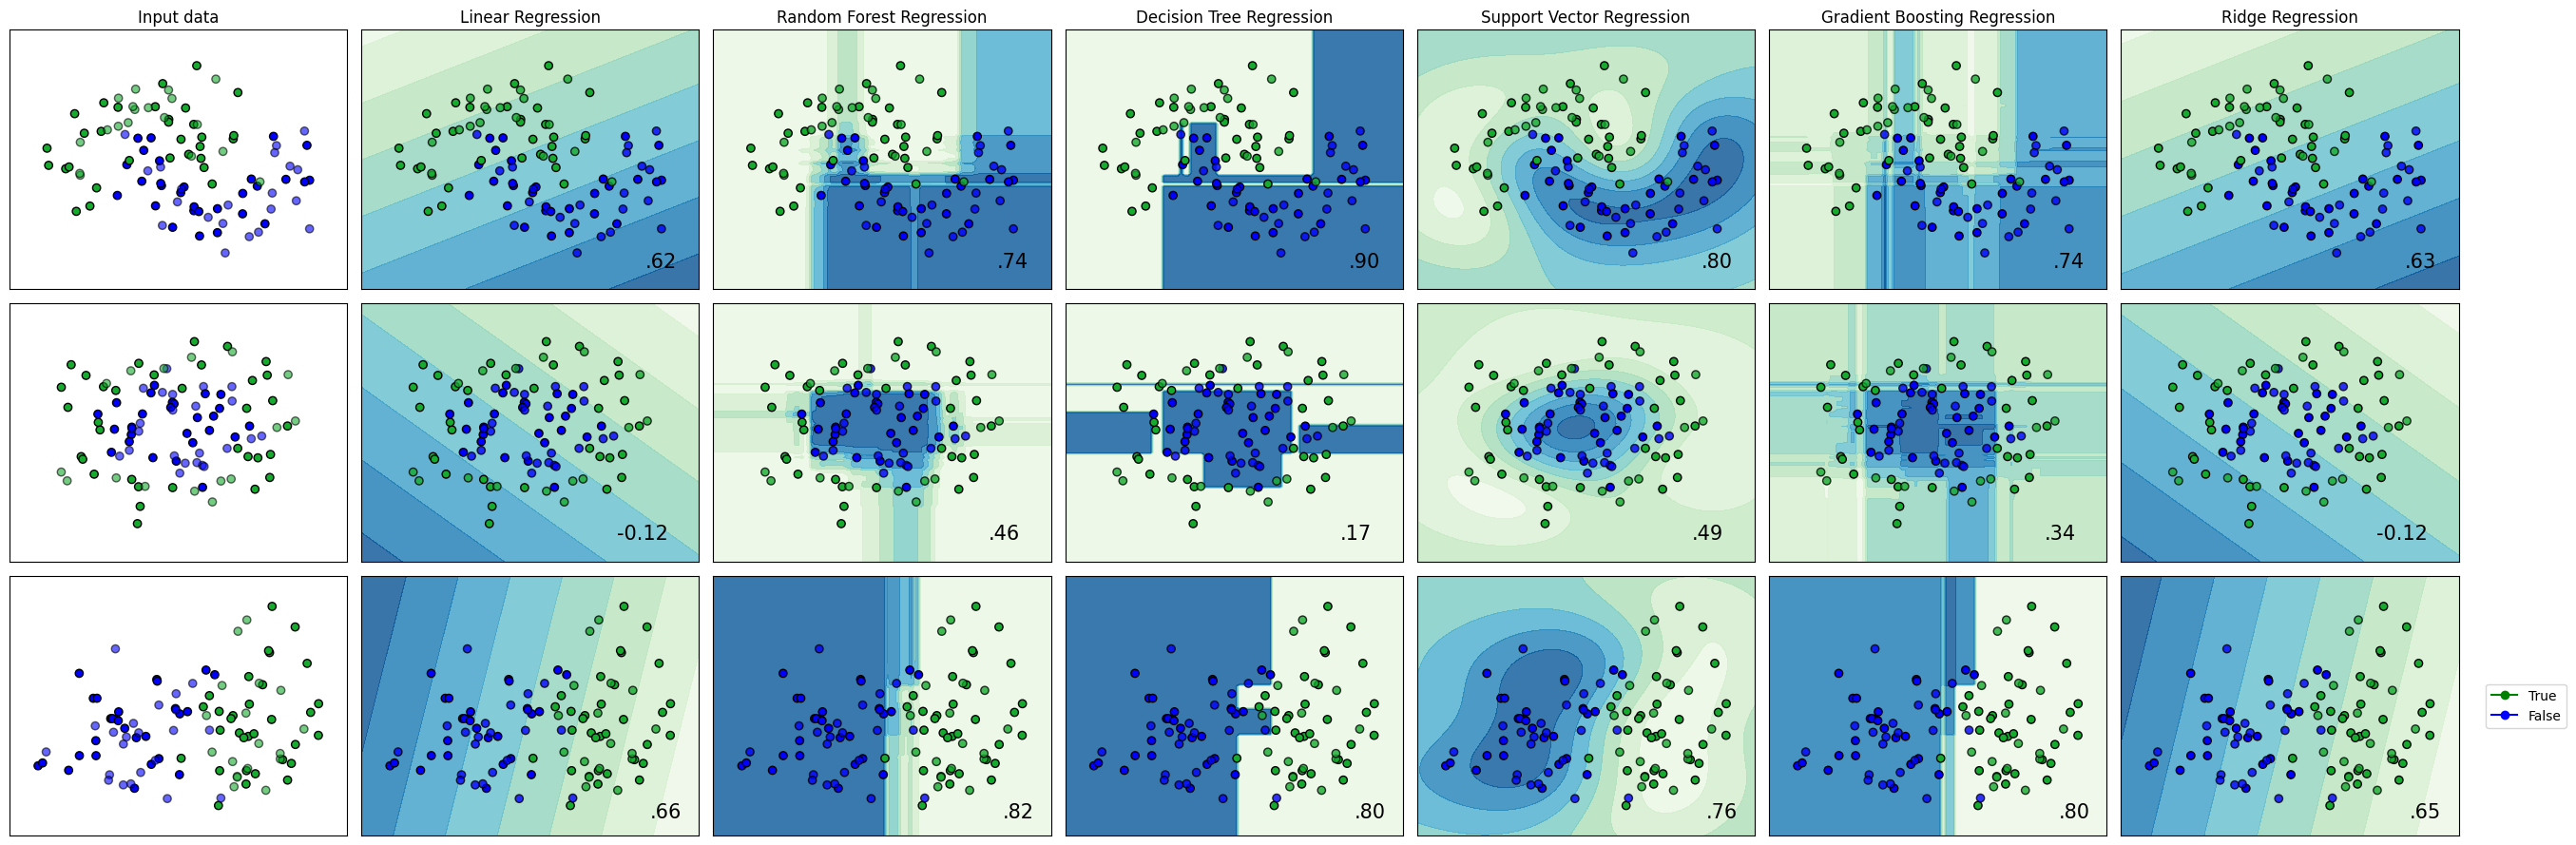

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd

fn = 'O1_1_terrain_parameters - Sheet1.csv'  # file name

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,

]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # plot data


# COLOR SCHEME BELOW:
    cm = plt.cm.GnBu
    cm_bright = ListedColormap(["#16ab2f", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")

    # Plot training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=(cm_bright), edgecolors="k")

    # Plot testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.8,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

legend_colors = ["g", "b"]
legend_labels = ["True", "False"]
handles = [plt.Line2D([], [], marker='o', color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=handles, loc="center", bbox_to_anchor=(1.2, 0.5))


plt.tight_layout()
plt.show()


In [32]:

# Extract features and labels
X = df[['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']]
y = df['Zmin']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classification pipelines
pipelines = [
    make_pipeline(StandardScaler(), MLPClassifier()),
    make_pipeline(StandardScaler(), KNeighborsClassifier()),
    make_pipeline(StandardScaler(), SVC()),
    make_pipeline(StandardScaler(), GaussianProcessClassifier(kernel=RBF())),
    make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    make_pipeline(StandardScaler(), RandomForestClassifier()),
    make_pipeline(StandardScaler(), AdaBoostClassifier()),
    make_pipeline(StandardScaler(), GaussianNB()),
    make_pipeline(StandardScaler(), QuadraticDiscriminantAnalysis()),
]


# Train and evaluate classifiers
scores = []
for pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    scores.append(score)
    print(f"Classifier: {pipeline[-1].__class__.__name__}")
    print(f"Score: {score}")


# Plot decision boundaries
for i, pipeline in enumerate(pipelines):
    ax = plt.subplot(len(pipelines), 2, i + 1)
    DecisionBoundaryDisplay.from_estimator(
        pipeline, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
    )
    ax.set_title(pipeline[-1].__class__.__name__)
# Visualize the results
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5


# Plot data and decision boundaries
ax = plt.subplot(1, 2, 1)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=(cm_bright), edgecolors="k")
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
ax.set_xlim(x_min, x_max)









/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier: MLPClassifier
Score: 0.1
Classifier: KNeighborsClassifier
Score: 0.0
Classifier: SVC
Score: 0.2


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning:

Classifier: GaussianProcessClassifier
Score: 0.1
Classifier: DecisionTreeClassifier
Score: 0.2
Classifier: RandomForestClassifier
Score: 0.2
Classifier: AdaBoostClassifier
Score: 0.1
Classifier: GaussianNB
Score: 0.2


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


ValueError: ignored

In [ ]:
#Test the reliability! Run allll cells first.


classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    RidgeClassifier()
]

names = [
    "Logistic Regression",
    "Random Forest Classifier",
    "Decision Tree Classifier",
    "Support Vector Classifier",
    "Gradient Boosting Classifier",
    "Ridge Classifier"
]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cross_val_accuracies = []

for classifier in classifiers:
    cross_val_accuracy = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy').mean()*100
    cross_val_accuracies.append(cross_val_accuracy)

    #Test size = percentage of each fold

print("Cross-validated accuracy scores of each classifier: ")
print(" ")
for i in range(len(classifiers)):
    print(f"{names[i]}: {cross_val_accuracies[i]}", "%")




Cross-validated accuracy scores of each classifier: 
 
Logistic Regression: 95.0 %
Random Forest Classifier: 92.5 %
Decision Tree Classifier: 92.5 %
Support Vector Classifier: 93.75 %
Gradient Boosting Classifier: 92.5 %
Ridge Classifier: 95.0 %


In [ ]:
#Output is weird, need to change it!! SOS
#Run all cells first!


# Modified the for loop. (# Iterate over classifiers: for i, (name, clf) in enumerate(zip(names, classifiers))

#this code performs K-fold cross-validation for multiple classifiers, trains and evaluates the models on each fold, calculates the mean absolute error for each classifier, and displays the performance results.

#k fold will split the data set into equal(ish) parts, then it will be trained and evaluated a certain amount of times.

# Initialize performance metrics
abs_err = np.zeros(len(names)) # absolute error [m]

# Iterate over classifiers
for i, (name, clf) in enumerate(zip(names, classifiers)):
    print(name)

    # Conduct K-Fold cross-validation
    num_folds = 10
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=1)
    abs_err_folds = np.zeros(num_folds) # absolute error for all folds
    j = 0 # fold counter

    # loop through fold indices
    for train_ix, test_ix in kfold.split(X):
        # split data into training and testing using kfold indices
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        # fit model to X_train and y_train
        clf.fit(X_train, y_train)

        # predict outputs for X_test values
        y_pred = clf.predict(X_test)

        # calculate performance metrics
        abs_err_folds[j] = np.nanmean(np.abs(y_test - y_pred))
        j += 1

    # take average performance metrics for all folds
    abs_err[i] = np.nanmean(abs_err_folds)

    # display performance results
    print('    Mean absolute error = ' + str(np.round(abs_err[i])) + ' m')


Logistic Regression
    Mean absolute error = 0.0 m
Random Forest Classifier
    Mean absolute error = 0.0 m
Decision Tree Classifier
    Mean absolute error = 0.0 m
Support Vector Classifier
    Mean absolute error = 0.0 m
Gradient Boosting Classifier
    Mean absolute error = 0.0 m
Ridge Classifier
    Mean absolute error = 0.0 m


In [ ]:

#Next steps:

#mess with colors, for funsies

#Plot which one is best

#ROC curve & area under the curve

#label true (what color = true)

NameError: ignored